In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
df_train = pd.read_csv('../data/raw/train.csv')
print(len(df_train))
df_train.head(10)

68613


,MOFname,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],functional_groups,metal_linker,organic_linker1,organic_linker2,topology,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],CO2_working_capacity [mL/g]
0,mof_unit_1,1116.667429,875.240600,0.00,0.07899,0.0607,COOH-OEt,3,4,11,pcu,22.864166,6.786041,105.284502
1,mof_unit_2,2769.503842,2211.697211,603.61,0.13794,0.1040,F-OMe,10,44,57,etb,33.616780,7.147286,101.224774
2,mof_unit_3,1089.818728,773.687960,788.50,0.14874,0.1262,OMe-COOH,2,22,24,pcu,19.263726,6.347967,118.987011
3,mof_unit_4,2205.198301,1304.638720,1441.53,0.21814,0.2220,H-SO3H,9,17,24,sra,25.701377,6.190085,187.626004
4,mof_unit_5,1137.800963,901.736120,0.00,0.07778,0.0591,NHMe-OH,2,1,22,pcu,30.001838,6.478063,79.210001
5,mof_unit_6,3954.659761,1543.027680,2430.55,0.37094,0.5725,Pr-NO2,9,7,23,sra,17.146541,5.398304,55.786959
6,mof_unit_7,3565.914939,1954.749656,1530.02,0.33337,0.3662,NH2,10,53,55,etb,18.363791,6.303857,111.690462
7,mof_unit_8,916.043907,639.111560,1685.58,0.28458,0.2456,Br,2,5,13,pcu,12.684804,5.234732,58.989774
8,mof_unit_9,2228.882339,1422.691820,1458.02,0.24277,0.2291,HCO,4,14,19,acs,37.040424,6.298964,135.587108
9,mof_unit_10,4275.421420,1606.196000,3276.11,0.41004,0.6573,NHMe-OH,3,13,29,pcu,10.999299,5.539327,59.739057


In [6]:
df_train.tail()

,MOFname,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],functional_groups,metal_linker,organic_linker1,organic_linker2,topology,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],CO2_working_capacity [mL/g]
68608,mof_unit_68609,1188.302573,1001.700216,0.0,0.00000,0.0,Pr-F,3,4,24,pcu,24.131770,NaN,-12.943652
68609,mof_unit_68610,1506.660363,1493.296496,0.0,0.01108,0.0,SO3H,10,42,46,etb,6.071818,NaN,-12.985582
68610,mof_unit_68611,2035.532738,1959.518320,0.0,0.00000,0.0,OPr,4,14,22,acs,9.876134,NaN,-13.187635
68611,mof_unit_68612,3985.426053,3638.677280,0.0,0.00000,0.0,OPr-Me,4,4,15,acs,5.285051,inf,15.672698
68612,mof_unit_68613,1591.009408,2071.219000,0.0,0.01609,0.0,I-OEt,2,9,16,pcu,2.621272,inf,3.144708


## Missing Data

In [4]:
df_train.replace({np.inf,- np.inf}, np.nan, inplace=True)

In [5]:
df_train.isna().sum(axis=0)

MOFname                                             0
volume [A^3]                                        0
weight [u]                                          0
surface_area [m^2/g]                                0
void_fraction                                       0
void_volume [cm^3/g]                                0
functional_groups                                 323
metal_linker                                        0
organic_linker1                                     0
organic_linker2                                     0
topology                                            0
CO2/N2_selectivity                                  0
heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]    2089
CO2_working_capacity [mL/g]                         0
dtype: int64

In [6]:
df_train_drop = df_train.dropna()

In [7]:
df_train_drop.describe()

,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],metal_linker,organic_linker1,organic_linker2,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],CO2_working_capacity [mL/g]
count,66203.000000,66203.000000,66203.000000,66203.000000,66203.000000,66203.000000,66203.000000,66203.000000,66203.000000,66203.000000,66203.000000
mean,3492.507519,1650.170238,1714.389073,0.266775,0.386071,4.121294,11.503572,20.267390,27.433196,6.024007,123.762104
std,4854.967581,1262.418400,1351.150029,0.160315,0.475529,3.094715,10.188891,9.724248,23.763066,1.382389,88.162330
min,606.576038,439.281220,-1.000000,-1.000000,0.000000,1.000000,1.000000,1.000000,1.337830,1.612299,-44.285746
25%,1570.108078,891.326890,649.910000,0.152090,0.129200,2.000000,4.000000,14.000000,13.361640,5.270233,68.204430
50%,2223.697099,1248.686560,1591.550000,0.248520,0.257200,3.000000,10.000000,20.000000,20.173395,5.900900,101.265053
75%,3731.622666,1881.463278,2551.890000,0.348445,0.451000,4.000000,16.000000,25.000000,33.506651,6.770337,165.684112
max,223964.854408,22595.928960,7083.530000,0.872060,6.610100,12.000000,59.000000,59.000000,914.244140,17.155375,736.061636


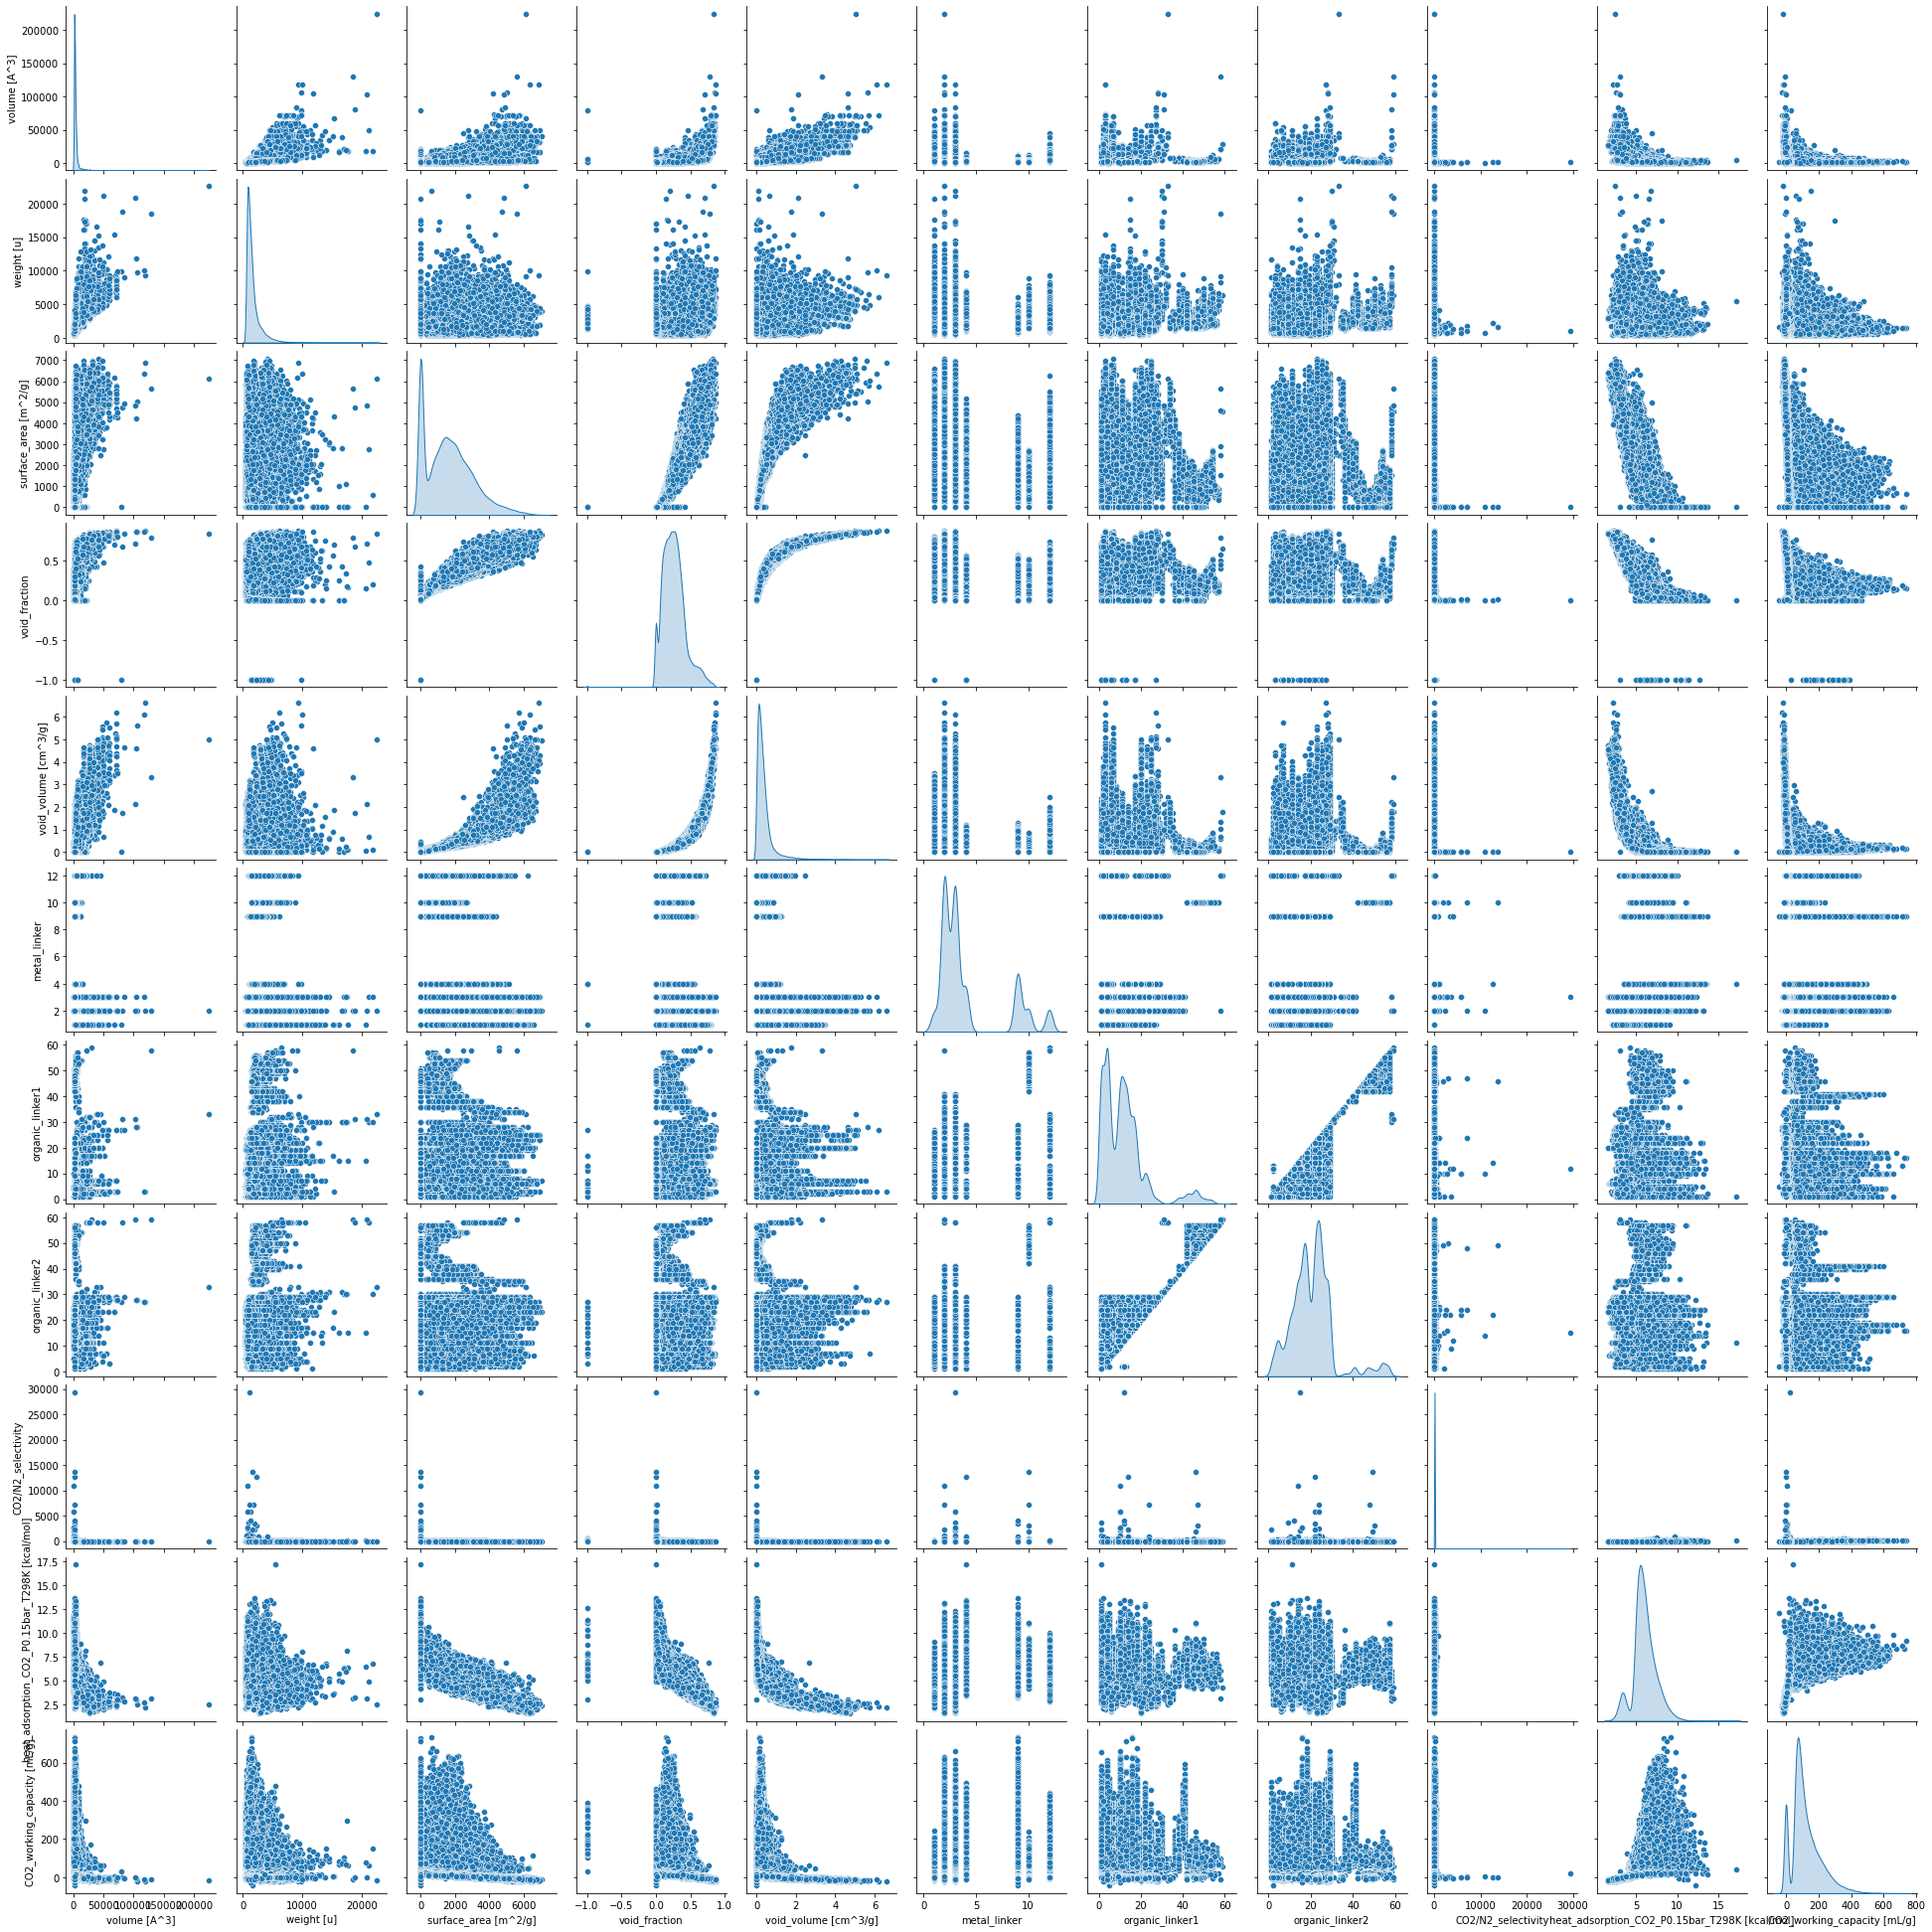

In [8]:
sns.pairplot(data=df_train, diag_kind='kde')

# Correlation

In [14]:
def plot_corr(corr, figsize=(9, 8)):
    corr = corr.abs()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(corr, mask=mask, annot=True, vmax=.3, cmap='Blues', square=True)

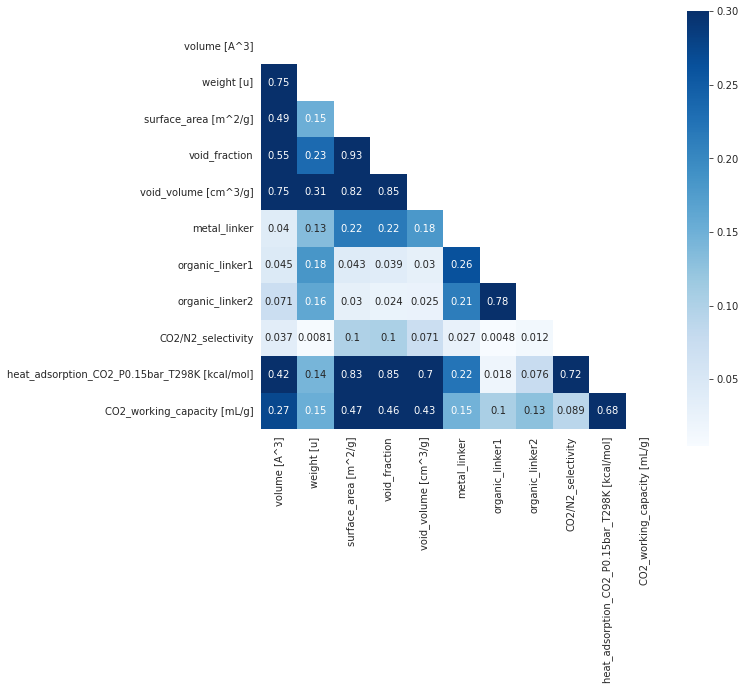

In [15]:
plot_corr(df_train.corr())

# Visualize Feature

## Heat Adsorption


In [16]:
df_train_drop_nan_heat = df_train[~df_train['heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]'].isna()]

<Figure size 1080x1080 with 0 Axes>

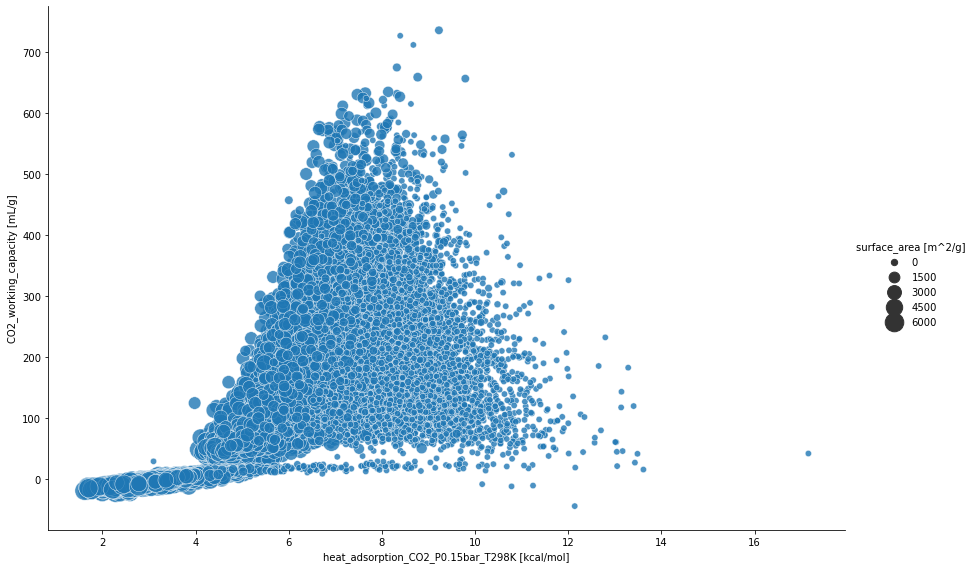

In [17]:
plt.figure(figsize=(15, 15))
sns.relplot(
    x = 'heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]',
    y = 'CO2_working_capacity [mL/g]',
    data=df_train_drop_nan_heat,
    size = 'surface_area [m^2/g]',
    sizes = (40, 400),    
    height=8, aspect=1.5, alpha=.8
);

## surface_area [m^2/g]

In [18]:
print(len(df_train_drop[df_train_drop['surface_area [m^2/g]'] == 0]))
df_train_drop[df_train_drop['surface_area [m^2/g]'] == 0]

12370


,MOFname,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],functional_groups,metal_linker,organic_linker1,organic_linker2,topology,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],CO2_working_capacity [mL/g]
0,mof_unit_1,1116.667429,875.240600,0.0,0.07899,0.0607,COOH-OEt,3,4,11,pcu,22.864166,6.786041,105.284502
4,mof_unit_5,1137.800963,901.736120,0.0,0.07778,0.0591,NHMe-OH,2,1,22,pcu,30.001838,6.478063,79.210001
11,mof_unit_12,1175.475860,1397.051280,0.0,0.05704,0.0289,Me-Br,2,22,24,pcu,58.106974,7.407898,101.964812
13,mof_unit_14,1071.619874,701.628600,0.0,0.10455,0.0962,OEt-CN,2,12,22,pcu,31.664456,7.427183,133.371121
19,mof_unit_20,919.305781,689.174400,0.0,0.07816,0.0628,CN,3,10,18,pcu,47.332721,7.957782,136.387400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66327,mof_unit_66328,1737.316693,1826.919016,0.0,0.03946,0.0226,Br-H,10,47,49,etb,20.408789,6.348634,16.613469
66348,mof_unit_66349,1157.233975,1658.135855,0.0,0.06235,0.0262,Br-F,3,14,22,pcu,14.440443,6.526421,22.038710
66398,mof_unit_66399,1618.117631,1671.636320,0.0,0.06529,0.0381,Et-Br,9,4,12,sra,31.001223,6.455905,13.252675
66439,mof_unit_66440,1252.881442,968.163080,0.0,0.04015,0.0313,OPr,1,10,10,pcu,22.807274,7.947595,15.151221


In [19]:
df_train_drop_no_zero_surface_area = df_train_drop[df_train_drop['surface_area [m^2/g]'] != 0]

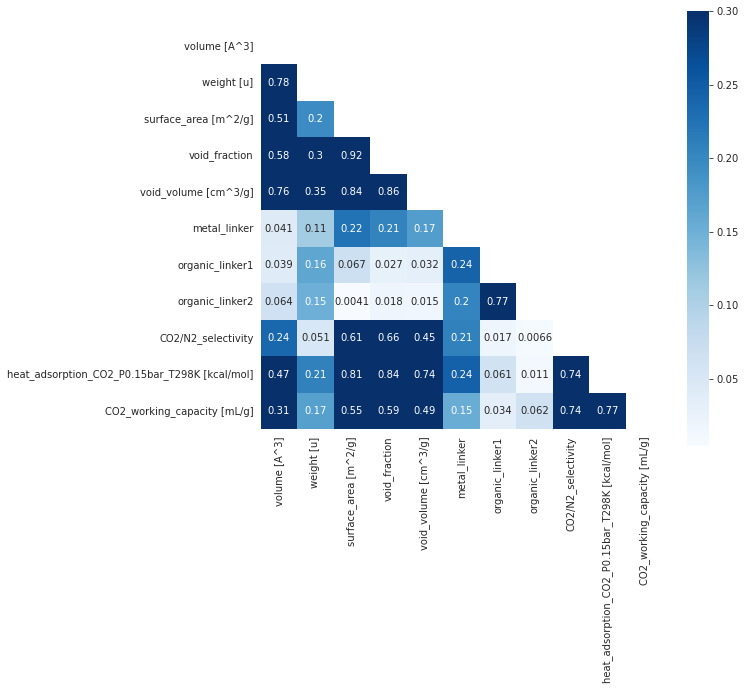

In [20]:
plot_corr(df_train_drop_no_zero_surface_area.corr())

In [21]:
df_train_drop_no_zero_surface_area[df_train_drop_no_zero_surface_area['surface_area [m^2/g]'] == 0]

,MOFname,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],functional_groups,metal_linker,organic_linker1,organic_linker2,topology,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],CO2_working_capacity [mL/g]


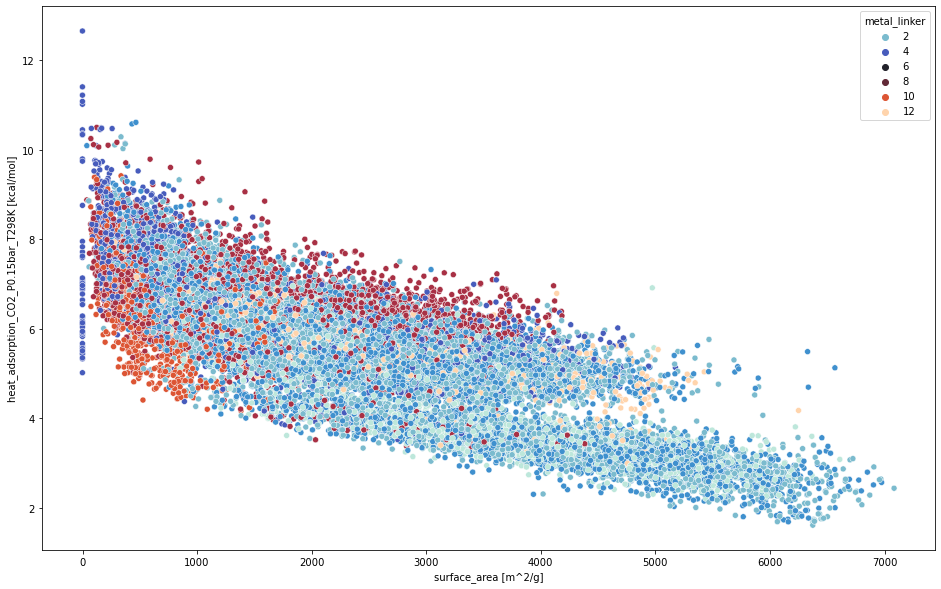

In [22]:
plt.figure(figsize=(16, 10))
sns.scatterplot(
    x='surface_area [m^2/g]', y='heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]',
    data = df_train_drop_no_zero_surface_area,
    hue='metal_linker', palette="icefire"
    );

## Metal Linker

In [23]:
df_train_drop['metal_linker'].value_counts()

2     22290
3     20901
9      8216
4      6411
12     3242
1      2707
10     2436
Name: metal_linker, dtype: int64

<AxesSubplot:xlabel='metal_linker', ylabel='CO2_working_capacity [mL/g]'>

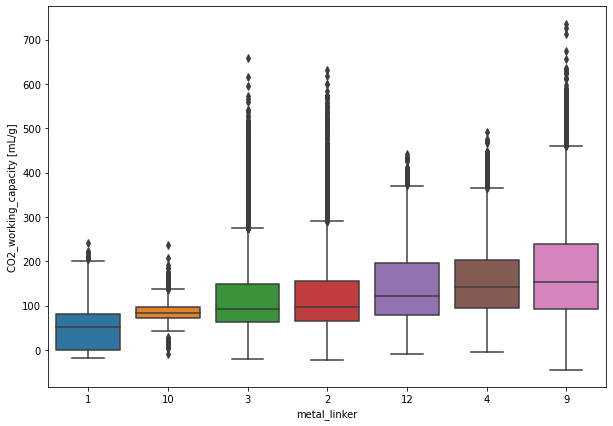

In [24]:
plt.figure(figsize=(10, 7))
sns.boxplot(
    x = 'metal_linker',
    y = 'CO2_working_capacity [mL/g]',
    data = df_train_drop,
    order = df_train_drop.groupby('metal_linker')['CO2_working_capacity [mL/g]'].mean().sort_values().index
)

## void_volume [cm^3/g]

In [25]:
df_train_drop['void_volume [cm^3/g]'].value_counts().sort_index()

0.0000    1065
0.0100       1
0.0101       1
0.0102       2
0.0103       2
          ... 
5.7122       1
5.7286       1
6.0965       1
6.1825       1
6.6101       1
Name: void_volume [cm^3/g], Length: 12550, dtype: int64

## void_fraction

In [26]:
df_train_drop['void_fraction'].value_counts().sort_index()

-1.00000     55
 0.00000    977
 0.00286      1
 0.00288      1
 0.00297      1
           ... 
 0.86256      1
 0.86555      1
 0.86640      1
 0.86757      1
 0.87206      1
Name: void_fraction, Length: 37033, dtype: int64

## topology

In [27]:
df_train_drop['topology'].value_counts()

pcu    41807
sra     8216
acs     6411
bcu     3200
nbo     3010
etb     2436
fof      849
pts      193
the       42
tbo       36
rht        3
Name: topology, dtype: int64

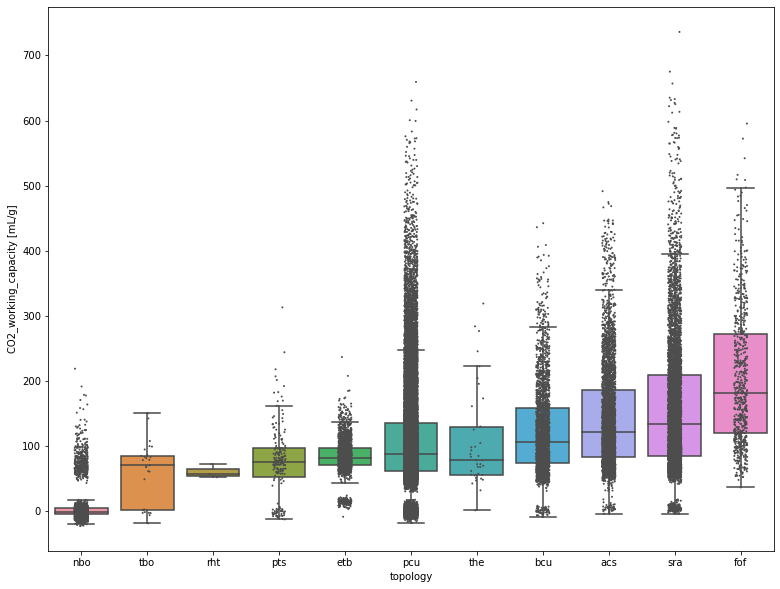

In [28]:
plt.figure(figsize=(13, 10))
sns.boxplot(
    x='topology', y='CO2_working_capacity [mL/g]',
    data=df_train_drop_no_zero_surface_area,
    order=df_train_drop_no_zero_surface_area.groupby('topology')['CO2_working_capacity [mL/g]'].mean().sort_values().index,
    showfliers=False
)

sns.stripplot(
    x='topology', y='CO2_working_capacity [mL/g]',
    data=df_train_drop_no_zero_surface_area,
    order=df_train_drop_no_zero_surface_area.groupby('topology')['CO2_working_capacity [mL/g]'].mean().sort_values().index,
    size=2, color=".3", linewidth=0
);

<Figure size 1440x1440 with 0 Axes>

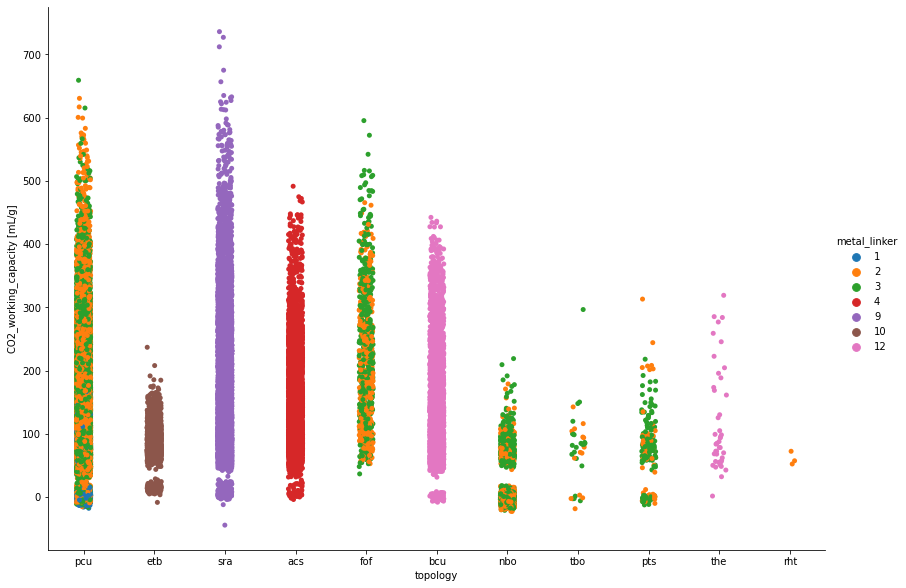

In [29]:
plt.figure(figsize=(20, 20))
sns.catplot(
    x = 'topology',
    y = 'CO2_working_capacity [mL/g]',
    hue = 'metal_linker',
    data = df_train_drop,
    height=8.27, aspect=11.7/8.27
)